In [ ]:
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 759.3 kB/s eta 0:00:00


In [ ]:
#Grab Data
import yfinance as yf

#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

In [ ]:
#Create a Portfolio
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'NVDA', 'V', 'JPM', 'UNH',
           'JNJ', 'BAC', 'WMT', 'PG', 'HD', 'MA', 'XOM', 'PFE', 'DIS', 'CVX',
           'KO', 'AVGO', 'PEP', 'CSCO', 'WFC', 'COST', 'LLY', 'ADBE']

In [ ]:
#Get the stock data
portfolio = yf.download(tickers, start="2009-12-31", end="2021-12-31")['Adj Close']

portfolio.head()

[*********************100%%**********************]  27 of 27 completed


Ticker,AAPL,ADBE,AMZN,AVGO,BAC,BRK-A,COST,CSCO,CVX,DIS,...,MSFT,NVDA,PEP,PFE,PG,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,6.371568,36.779999,6.7260,13.119761,12.169487,99200.0,42.326954,16.234901,43.810333,27.999454,...,23.075758,4.283800,40.144829,10.077284,39.582512,24.648186,19.745792,18.545897,13.006511,39.679165
2010-01-04,6.470741,37.090000,6.6950,13.528635,12.678571,99600.0,42.498627,16.743507,44.988239,27.843178,...,23.431587,4.240229,40.435360,10.487246,39.902409,25.497292,19.899319,18.772650,13.196312,40.237782
2010-01-05,6.481929,37.700001,6.7345,13.629057,13.090686,99710.0,42.369881,16.668913,45.306896,27.773722,...,23.439157,4.302147,40.923954,10.337664,39.915470,25.456852,19.671289,19.288006,13.064907,40.394897
2010-01-06,6.378825,37.619999,6.6125,13.736653,13.244217,99850.0,42.920692,16.560410,45.312588,27.626129,...,23.295319,4.329666,40.514584,10.304422,39.726135,25.707542,19.407146,19.315493,13.035706,40.744015
2010-01-07,6.367032,36.889999,6.5000,13.650578,13.680576,100000.0,42.713238,16.635006,45.141891,27.634808,...,23.053040,4.244815,40.257072,10.265643,39.510689,26.694115,19.587749,20.016375,13.043011,40.616016


In [ ]:
#SP500 ETF Benchmark
market_prices = yf.download("SPY", start="2009-12-31", end="2021-12-31")["Adj Close"]
market_prices.head()

[*********************100%%**********************]  1 of 1 completed


Date
2009-12-31    85.411476
2010-01-04    86.860046
2010-01-05    87.089996
2010-01-06    87.151299
2010-01-07    87.519188
Name: Adj Close, dtype: float64

In [ ]:
#Grap Market Capitalization for each stock in portfolio
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'AAPL': 2786359508992,
 'MSFT': 3073557397504,
 'GOOG': 2087091961856,
 'AMZN': 1963725291520,
 'BRK-A': 873474686976,
 'NVDA': 2303499960320,
 'V': 557910130688,
 'JPM': 551360659456,
 'UNH': 454869155840,
 'JNJ': 357584535552,
 'BAC': 294749732864,
 'WMT': 482539601920,
 'PG': 388101439488,
 'HD': 339220004864,
 'MA': 417741078528,
 'XOM': 526982643712,
 'PFE': 159457116160,
 'DIS': 213640921088,
 'CVX': 299114037248,
 'KO': 268601294848,
 'AVGO': 607225184256,
 'PEP': 241715593216,
 'CSCO': 190757339136,
 'WFC': 209841602560,
 'COST': 335488614400,
 'LLY': 728656510976,
 'ADBE': 221128310784}

In [ ]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf()  #to estimate the covariance matrix of asset returns while mitigating the effects of noise and instability in the data.

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

4.70029582081336

<Axes: xlabel='Ticker', ylabel='Ticker'>

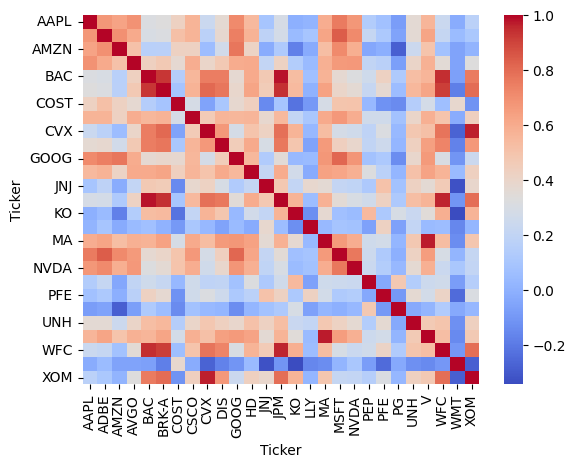

In [ ]:
#Visualize the Covariant Correlation
sns.heatmap(S.corr(), cmap='coolwarm')

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

Ticker
AAPL     0.213317
ADBE     0.214504
AMZN     0.214827
AVGO     0.229926
BAC      0.216661
BRK-A    0.137528
COST     0.119706
CSCO     0.178126
CVX      0.165922
DIS      0.157113
GOOG     0.201192
HD       0.157447
JNJ      0.107029
JPM      0.187264
KO       0.103982
LLY      0.122310
MA       0.206259
MSFT     0.209607
NVDA     0.309759
PEP      0.109811
PFE      0.117147
PG       0.099196
UNH      0.157729
V        0.184280
WFC      0.183616
WMT      0.095890
XOM      0.146092
dtype: float64

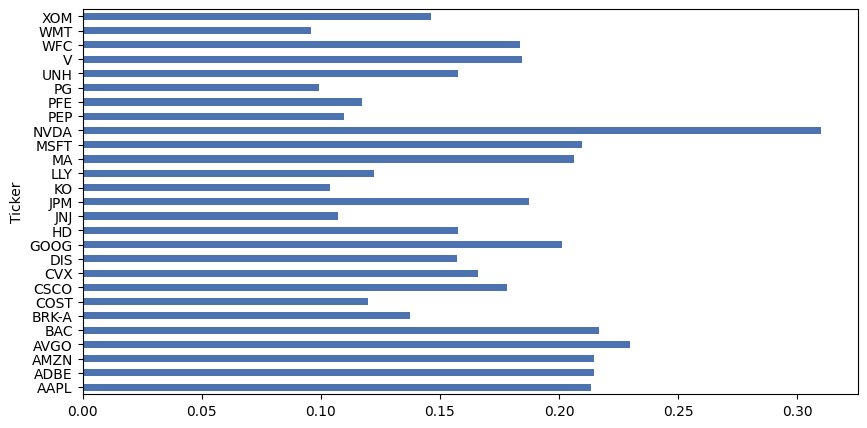

In [ ]:
#What am I looking at here?
market_prior.plot.barh(figsize=(10,5));

In [ ]:
## Step 3: Integrating Views

In [ ]:
viewdict={'AAPL':0.005, 'MSFT':0.003, 'GOOG':0.08, 'AMZN':0.08, 'BRK-A':0.38, 'LLY':0.001, 'V':0.001, 'JPM':0.001, 'UNH':0.015,
             'JNJ':0.012, 'NVDA':0.5, 'PG':0.08, 'HD':0.01, 'XOM':0.01, 'PFE':0.03, 'DIS':0.05, 'CVX':0.06,
             'KO':0.03,'WMT':0.03, 'ADBE':0.02}

In [ ]:
#we don't have to provide views on all the assets


bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [ ]:
### Creating confidence: we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals,
#i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences


In [ ]:
#fisrt views
intervals = [(0, 0.25), (0, 0.24),(-0.1, 0.15),(-0.05, 0.1),(0.15, 0.25),(-0.1, 0),(0.1, 0.2),(0.08, 0.12),(0.1, 0.9),(0, 0.3),(0, 0.25),
 (0.1, 0.4),(-0.1, 0.15),(-0.05, 0.1),(0.15, 0.25),(-0.1, 0),(0.1, 0.2),(0.1, 0.9),(0.1, 0.9),(0, 0.3)]
#second views
intervals = [(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(-0.1,0),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9),(0.1,0.9)]

In [ ]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.0144, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225, 0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.16000000000000003, 0.16000000000000003, 0.0225]


In [ ]:
## Step 4: Calculate Posterior Estimate Returns

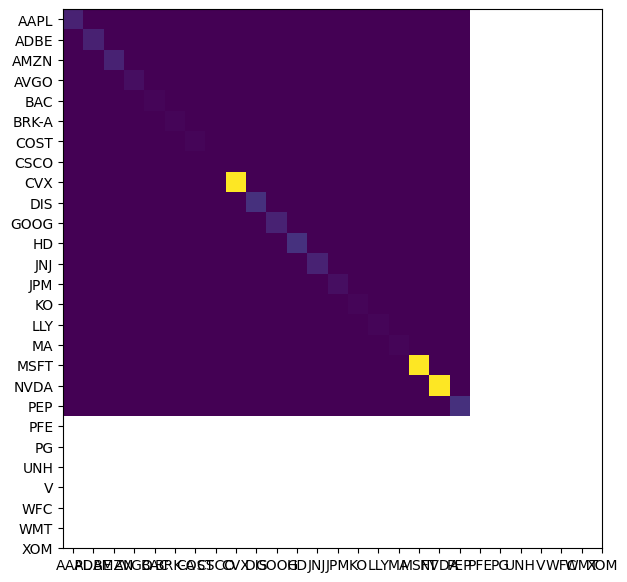

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

Ticker
AAPL     0.116831
ADBE     0.108101
AMZN     0.115611
AVGO     0.133264
BAC      0.057279
BRK-A    0.118409
COST     0.067303
CSCO     0.091720
CVX      0.064044
DIS      0.061433
GOOG     0.106449
HD       0.075995
JNJ      0.049212
JPM      0.024145
KO       0.047460
LLY      0.033322
MA       0.084134
MSFT     0.110087
NVDA     0.268001
PEP      0.053390
PFE      0.040618
PG       0.050091
UNH      0.076849
V        0.059552
WFC      0.053798
WMT      0.050968
XOM      0.052414
dtype: float64

In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AAPL,0.213317,0.116831,0.005
ADBE,0.214504,0.108101,0.020
AMZN,0.214827,0.115611,0.080
AVGO,0.229926,0.133264,NaN
BAC,0.216661,0.057279,NaN
BRK-A,0.137528,0.118409,0.380
COST,0.119706,0.067303,NaN
CSCO,0.178126,0.091720,NaN
CVX,0.165922,0.064044,0.060
DIS,0.157113,0.061433,0.050


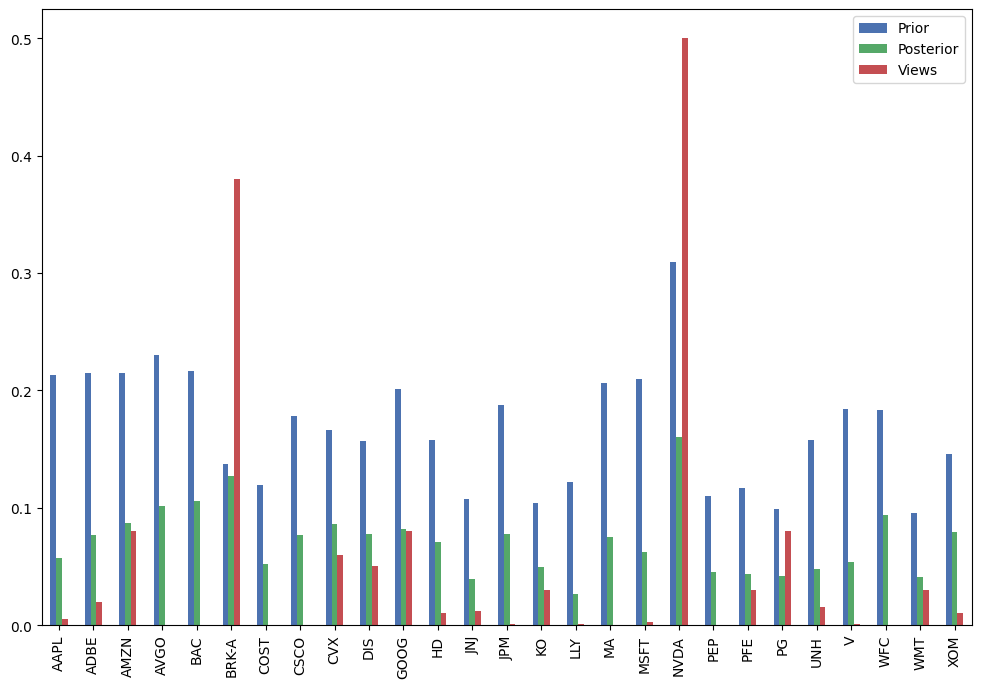

In [ ]:
rets_df.plot.bar(figsize=(12,8));

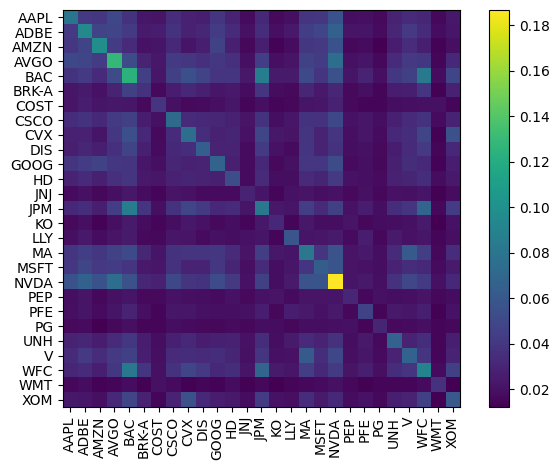

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [ ]:
## Step 5: Portfolio Allocation

In [ ]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('AAPL', 0.01491),
             ('ADBE', 0.03588),
             ('AMZN', 0.05416),
             ('AVGO', 0.06216),
             ('BAC', 0.0634),
             ('BRK-A', 0.11542),
             ('COST', 0.02212),
             ('CSCO', 0.04051),
             ('CVX', 0.05152),
             ('DIS', 0.0443),
             ('GOOG', 0.04836),
             ('HD', 0.03696),
             ('JNJ', 0.00734),
             ('JPM', 0.03401),
             ('KO', 0.0199),
             ('LLY', 0.0),
             ('MA', 0.0327),
             ('MSFT', 0.02082),
             ('NVDA', 0.1268),
             ('PEP', 0.01457),
             ('PFE', 0.01003),
             ('PG', 0.01223),
             ('UNH', 0.00688),
             ('V', 0.00921),
             ('WFC', 0.05666),
             ('WMT', 0.01226),
             ('XOM', 0.04692)])

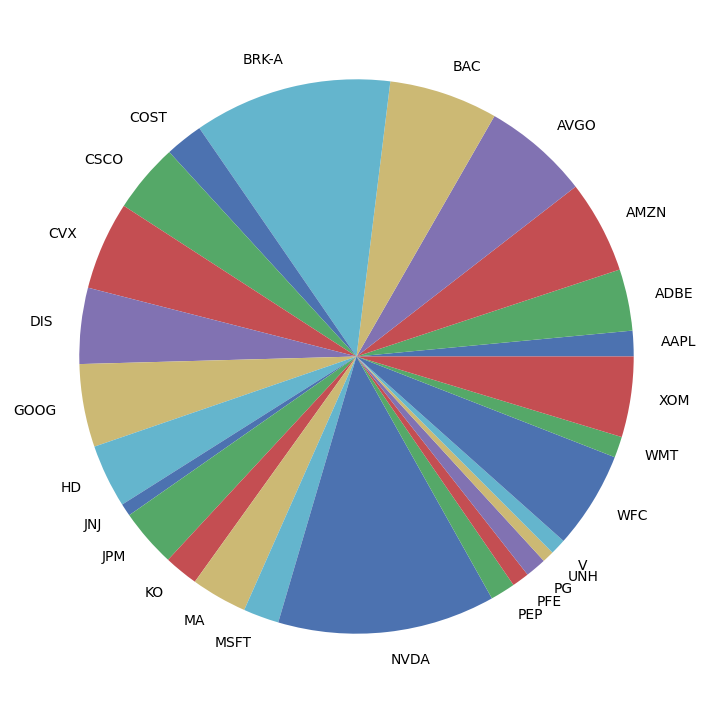

In [ ]:
pd.Series(weights).plot.pie(figsize=(9,9));

Expected annual return: 9.4%
Annual volatility: 19.9%
Sharpe Ratio: 0.37


/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


(0.09448705167462727, 0.19874852964783807, 0.3747803911133866)

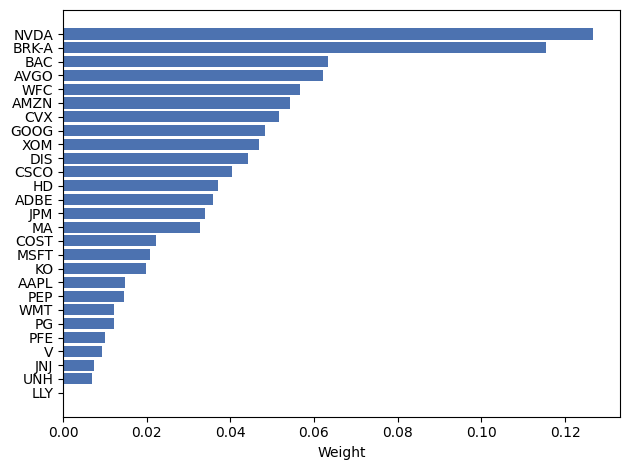

In [ ]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.009)

In [ ]:
weights.values

<function OrderedDict.values>

In [ ]:
BL=pd.DataFrame(weights, index=tickers)
BL=BL.rename(index={'MSFT': '0'})
BL=BL.iloc[1]
BL.to_csv('BL_weight.csv')

In [ ]:
act_daily_ret_df=pd.read_csv('act_daily_ret_df.csv')
act_daily_ret_df['Date'] = pd.to_datetime(act_daily_ret_df['Date'])
act_daily_ret_df.set_index('Date', inplace=True)

In [ ]:
#dataframe for daily portfolio returns
act_daily_port_ret_df = act_daily_ret_df.copy()
act_daily_port_ret_df.drop(columns=tickers, inplace=True)
# risk free return
risk_free_ret = 0.015

In [ ]:
# function for adding different portfolios
def add_portfolio(portfolio, weights):
    act_daily_port_ret_df[f'{portfolio} Return'] = act_daily_ret_df.dot(weights)
    act_daily_port_ret_df[f'{portfolio} Cum Prod Return'] = (1 + act_daily_port_ret_df[f'{portfolio} Return']).cumprod()

    exp_ret = act_daily_port_ret_df[f'{portfolio} Return'].mean()
    std = act_daily_port_ret_df[f'{portfolio} Return'].std()
    sharpe_ratio = (exp_ret - risk_free_ret) / std
    #VaR95=norm.ppf(0.95,exp_ret,std)

    print(portfolio)
    print('Weights:')
    print(weights)
    print(f'Expected Return: {exp_ret:.6f}')
    print(f'Standard Dev   : {std:.6f}')
    print(f'Sharpe Ratio   : {sharpe_ratio:.6f}')

In [ ]:
File=['MVO_w.csv','BL_weight.csv']

In [ ]:
for name in File:
  weight=pd.read_csv(name)
  A=np.array(weight['0'])
  add_portfolio(f'{name}',A)

MVO_w.csv
Weights:
[0.03947 0.04438 0.03777 0.0481  0.05492 0.03299 0.02526 0.04083 0.0411
 0.03749 0.03904 0.03549 0.02445 0.04782 0.02364 0.02731 0.04757 0.04186
 0.05611 0.0246  0.02711 0.02187 0.03642 0.04226 0.04715 0.01962 0.03536]
Expected Return: 0.000820
Standard Dev   : 0.010924
Sharpe Ratio   : -1.297998
BL_weight.csv
Weights:
[0.01491 0.03588 0.05416 0.06216 0.0634  0.11542 0.02212 0.04051 0.05152
 0.0443  0.04836 0.03696 0.00734 0.03401 0.0199  0.      0.0327  0.02082
 0.1268  0.01457 0.01003 0.01223 0.00688 0.00921 0.05666 0.01226 0.04692]
Expected Return: 0.000902
Standard Dev   : 0.011703
Sharpe Ratio   : -1.204677


In [ ]:
# # plotting parameters
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = (16,9)
# plt.rcParams['axes.grid'] = True
# plt.rcParams.update({'font.size': 12})

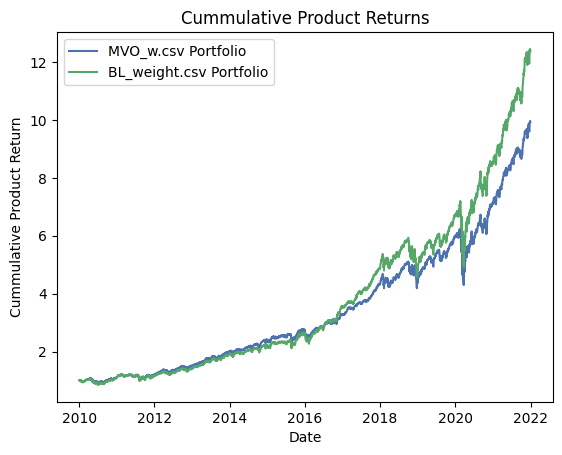

In [ ]:

for name in File:
      plt.plot(act_daily_ret_df.index,act_daily_port_ret_df[f'{name} Cum Prod Return'],label=f'{name} Portfolio')

plt.xlabel('Date')
plt.ylabel('Cummulative Product Return')
plt.title('Cummulative Product Returns')
#plt.ylim(0.9, 2)
plt.legend()
plt.show()